# **Actividad - Kmeans**


* Nombre: José Eduardo Díaz Maldonado
* Matrícula: A01735676



- Carga las librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set

<function seaborn.rcmod.set>

- Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros 6 renglones

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bestsellers with categories.csv to bestsellers with categories.csv
User uploaded file "bestsellers with categories.csv" with length 51161 bytes


In [85]:
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o no ficción.

Las variables que contiene son:



*   **Name**: Nombre del libro 
*   **Author**: Autor
*   **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5)
*   **Reviews**: Número de reseñas 
*   **Price**: Precio del libro
*   **Year**: Año de publicación
*   **Genre**: Género literario (ficción/no ficción)


# **Análisis estadístico**




1. Carga la tabla de datos y haz un análisis estadístico de las variables.

- Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


- Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.

In [ ]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
print('- Medianas -')
print('User Rating:',df['User Rating'].median())
print('Reviews:',df['Reviews'].median())
print('Price:',df['Price'].median())
print('Year:',df['Year'].median())

- Medianas -
User Rating: 4.7
Reviews: 8580.0
Price: 11.0
Year: 2014.0


- Basándote en la media, mediana y desviación estándar de cada variable. ¿qué conclusiones puedes entregar de los datos?

*Analizando las desviaciones de las variables, pude ver que la que tiene la mayor desviación es la variable de Reviews, mientras que la que tiene menor desviación es la variable de User Rating.*


In [ ]:
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


*Si vemos algunos ejemplos del dataframe, la variable User Rating tiene datos muy similares entre ellos, ya que esta información es basada en los titulos mas vendidos, normalmente eso implica que los usuarios den buenas reseñas del título.*

*Ahora viendo la variable de Reviews los datos varian, no todas las personas se dan el tiempo de escribir una reseña por eso la desviación es muy grande.*

*Las variables de año y precio también varian, pero no es algo enorme como Reviews pero sigue siendo grande para hacer una desviación.*

Calcula la correlación de las variables que consideres relevantes

In [ ]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


¿Cuáles son las variables relevantes e irrelevantes para el análisis?

*Para el análisis podemos calificar como irrelevantes a las variables cualitativas como name, genre y author, mientras que las variables cuantitativas se pueden calificar como relevantes.*

# **Análisis gráfico**

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:

- ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?

*Las variables de author y name no aportan nada en el análisis y son muy variadas, por lo que estas variables serían las que eliminaría.*

- ¿Existen variables que tengan datos extraños?

*Yo pondria la variable year como una variable con datos extraños, ya que los datos son numéricos, pero estos pueden ser tomados como cualitativos tambien, por eso puede afectar o no los gráficos.*

- Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?

*Primero que todo, no hay registros o datos vacíos en las variables por lo que no hay problema ahí, tambien no se tomarian en cuenta las variables cualitativas ya que no aportan información necesaria en el análisis por lo tanto nos quedan las otras variables.*

Los rangos son muy similares, por lo que al hacer gráficos se hacen grupos muy desproporcionados a simple vista, pero esto no hace imposible el hacer el análisis.

- ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

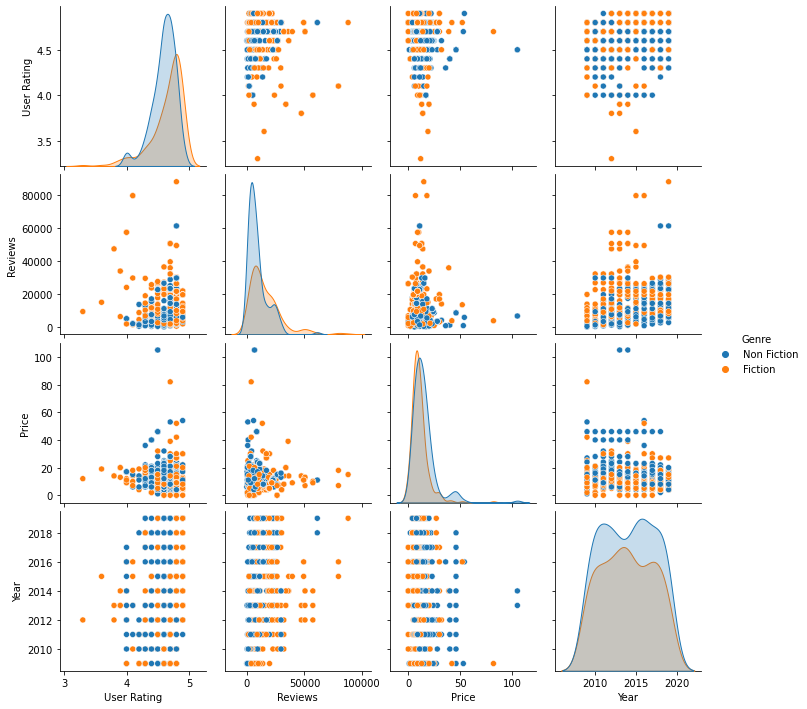

In [84]:
sns.pairplot(data=df, hue='Genre')


En las relaciones de User Rating, Reviews y Price con la variable Year se puede ver diferentes grupos de cada año.

Tambien las relaciones con las variables se puede ver grupos basandose en los precios de los libros, hay muchos libros que no pasan de los 60 dolares, pero aun así se pueden ver unos que rebasan los 100 dolares.

Por último, como habia mencionado en un punto anterior, al ser esta una lista de los topsellers es común que haya buenas reseñas y esto se muestra en los grupos de user ratings entre 4.5 a 5.

- Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contenter al menos:



*   1 gráfico de caja (boxplot)
*   1 mapa de calor
*   1 gráfico de dispersión



Text(0.5, 1.05, 'Distribución de las variables numéricas por género literario')

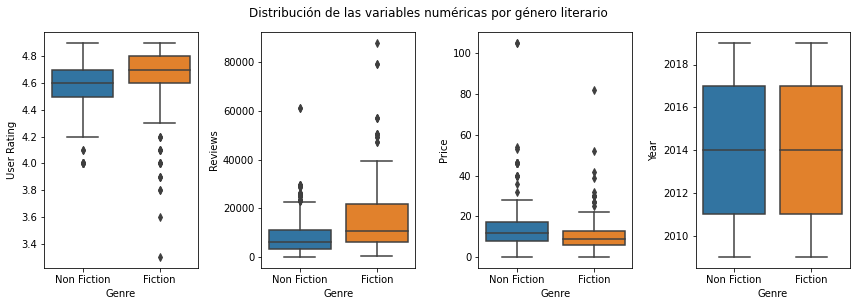

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

sns.boxplot(data=df, y = 'User Rating', x='Genre', ax=axs[0])
sns.boxplot(data=df, y = 'Reviews', ax=axs[1], x='Genre')
sns.boxplot(data=df, y = 'Price', ax=axs[2], x='Genre')
sns.boxplot(data=df, y = 'Year', ax=axs[3], x='Genre')

plt.tight_layout()

plt.suptitle('Distribución de las variables numéricas por género literario', y=1.05)

Text(0.5, 1.05, 'Heatmap de las variables numéricas por género literario')

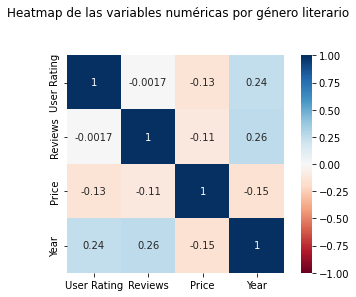

In [ ]:
df_corr = df.corr()
sns.heatmap(data=df_corr, vmin=-1, vmax = 1, cmap='RdBu', annot=True, square=True)

plt.suptitle('Heatmap de las variables numéricas por género literario', y=1.05)

Text(0.5, 1.05, 'Gráfico pares de las variables numéricas por género literario')

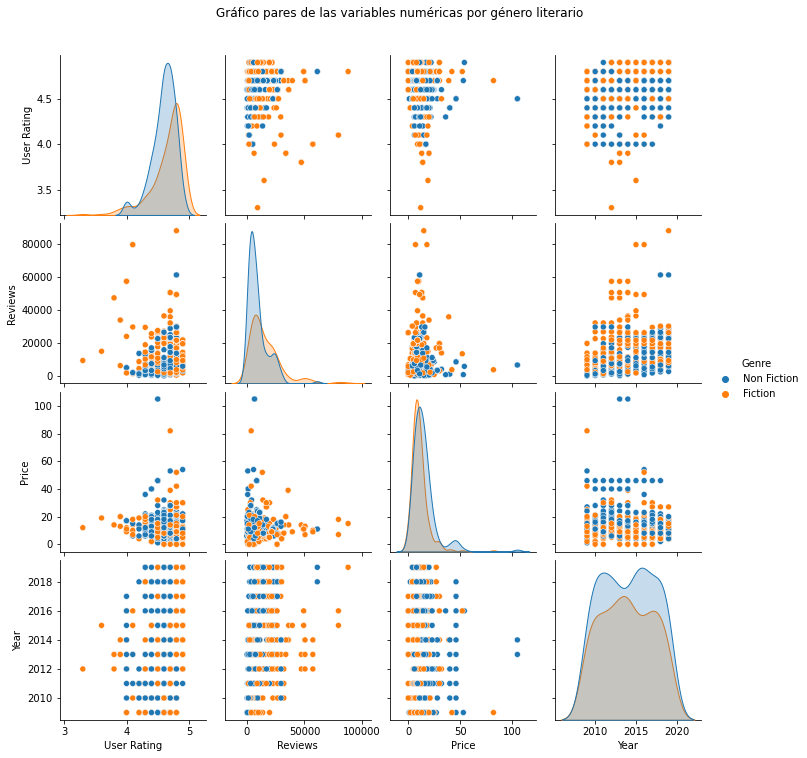

In [ ]:
sns.pairplot(data=df, hue='Genre')
plt.suptitle('Gráfico pares de las variables numéricas por género literario', y=1.05)

- Describe brevemente las conclusiones que se pueden obtener con las gráficas.

Concluyendo se puede ver que hay muchos datos que estan muy agrupados, pero también hay otros que estan completamente alejados.

Hay unos grupos mas ordenados que otros, en mi opinión si se hubieran usado datos afuera de los mejores libros se pudiera encontrar relaciones más concretas entre grupos, para poder crear estrategias. Pero con los datos obtenidos del dataframe siguen siendo buenos para hacer análisis, eso si, es importante que las variables cualitativas sean removidas para que estas no afecten con los resultados, ya que no aportan información correspondiente a las demás variables.


# **Clústering**

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['User Rating', 'Reviews', 'Price']
X = df.loc[:, numeric_cols]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,User Rating,Reviews,Price
0,0.359990,0.460453,-0.470810
1,-0.080978,-0.844786,0.821609
2,0.359990,0.599440,0.175400
3,0.359990,0.808050,-0.655441
4,0.800958,-0.365880,-0.101547


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmax   = 16
grupos = range(2, kmax)
wcss   = []
sil_score = []

for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k, random_state = 120)

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    sil_score.append(silhouette_score(X_norm, clusters))

Text(0.5, 1.0, 'Silhouette Score')

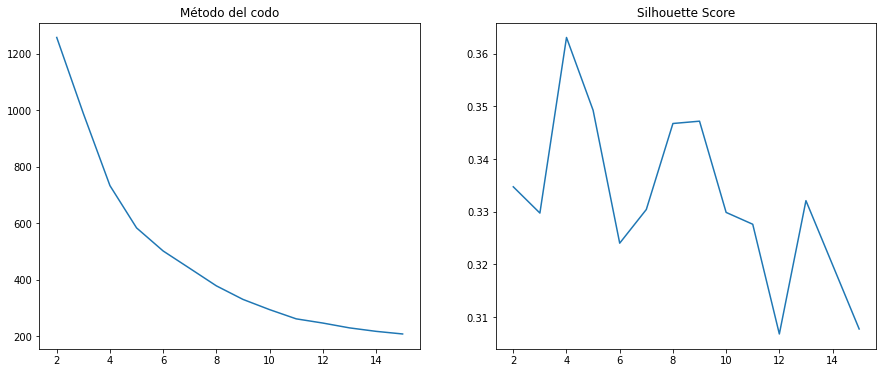

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

Para saber que valor le voy a dar K, use el método del codo y el silhoutte score, al ver las gráficas anteriores se puede ver que en el 3 empieza el primer pico del silhouette score y en el método del codo empieza a bajar más rápido.

Entonces se usara **3** como valor de K y por lo tanto como el número de grupos.


In [87]:
model = KMeans(n_clusters=3, random_state=120)
clusters = model.fit_predict(X_norm)

df['Grupo'] = clusters.astype('str')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Grupo
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,2
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,2
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,1


In [ ]:
df.groupby('Grupo').mean()

,User Rating,Reviews,Price,Year
Grupo,,,,
0,4.695489,27390.676692,9.624060,2015.293233
1,4.293814,8063.257732,23.690722,2012.958763
2,4.684687,6716.278125,11.334375,2013.778125


Basado en los centros responde las siguientes preguntas

Implementa el algoritmo de kmeans y justifica la elección del número de clusters. Usa las variables numéricas.

- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

Al comparar los grupos creados por el algoritmo kmeans y los centroides creados, tienen información parecida. 

Por ejemplo el grupo 0 y el grupo 2 tienen user ratings más cercanos que los del grupo 1 y eso se puede ver lo lejanos que estan el grupo 1 de los grupos 0 y 2.

Tambien otro ejemplo es que el grupo 0, en reviews tiene datos más grandes que los del grupo 2 y eso se puede ver como un centroide esta más arriba que el otro.

- ¿Cómo obtuviste el valor de k a usar?

Lo obtuve usando el método del codo y el silhouette score. En el 3 empieza a bajar más rapido en el método del codo y se forma el primer pico en el silhouette score.

- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

Si los datos estuvieran más alejados entre ellos, los centros se verían mucho más alejados de lo que ya se ven.

- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

Primero, habría mas grupos y por lo tanto habría mas centros y se verían más alejados entre ellos.

- ¿Qué puedes decir de los datos basándose en los centros?

Obviamante los centros se obtienen al promediar todos los datos en un grupo, podemos ver que hay una mayor diferencia en las variables de reviews y price pero aunque existan estas diferencias, hay algunos valores de los grupos que estan dispersos y muy alejados de su conjunto.

Esto es resultado de los valores, al muchos tener rangos similares pasa esto con los grupos. Se podría hacer más grupos pero serian innecesarios ya que se harían demasiados y el análisis seria más largo de lo común.

Text(0.5, 1.05, '3 grupos de clientes')

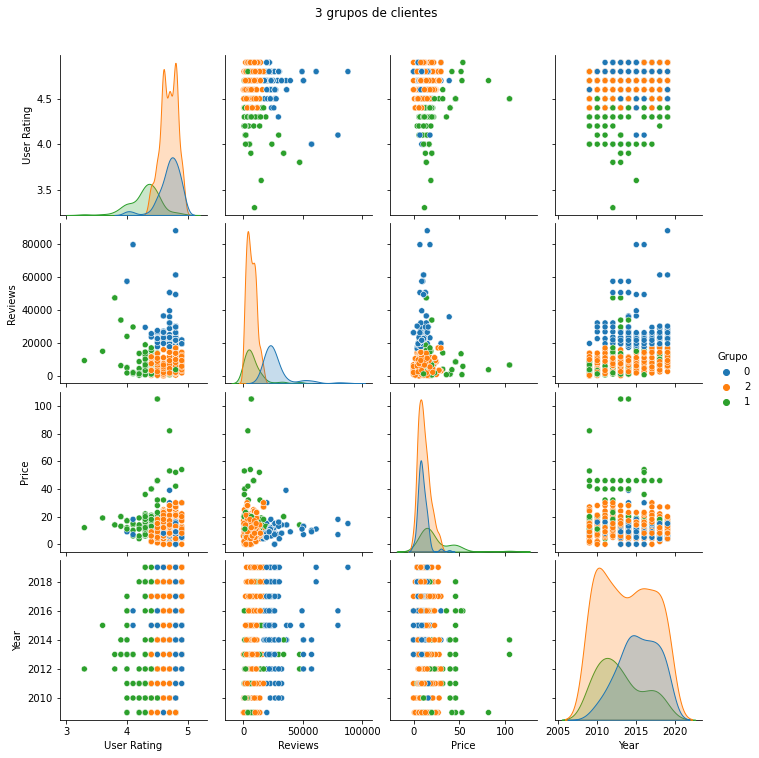

In [ ]:
sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('3 grupos', y=1.05)

Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

El grupo 0 Son libros conformados por user ratings de 4.7, con 27,000 reviews y con precios promedio de 9.6 dolares.

El grupo 1 Son libros conformados por user ratings de 4.3, con 8,000 reviews y con precios promedio de 24 dolares.

El grupo 2 Son libros conformados por user ratings entre 4.7, con 6,700 reviews y con precios promedio de 11 dolares.

Haz un análisis por grupo para determinar las características que los hace únicos. Ten en cuenta todas las variables numéricas.

In [76]:
df.groupby('Grupo').mean()

,User Rating,Reviews,Price,Year
Grupo,,,,
0,4.695489,27390.676692,9.624060,2015.293233
1,4.293814,8063.257732,23.690722,2012.958763
2,4.684687,6716.278125,11.334375,2013.778125


In [77]:
df.groupby('Grupo').std()

,User Rating,Reviews,Price,Year
Grupo,,,,
0,0.182933,12690.321616,5.242024,2.503882
1,0.247409,8685.280813,18.764084,2.954226
2,0.132198,4003.798134,6.535464,3.308224


Como se vio en el análisis estadístico. Reviews y Price tienen las desviaciones más grandes y al ver los gráficos podemos ver esos datos super alejados de sus grupos  y esto lo pudimos predecir al ver la desviación de las variables.

Poniendo otro ejemplo User Rating tiene las desviaciones más pequeñas y por eso muchos de los datos se mantienen muy compactos en una esquina.

Grafica los grupos con un pairplot y con un scatterplot en 3D (si es necesario). Analiza las características de cada grupo.

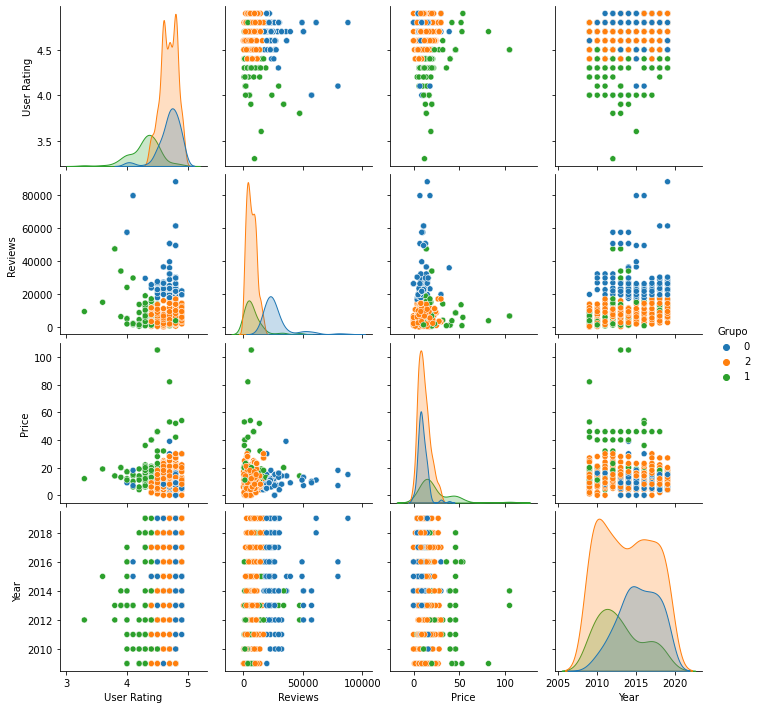

In [81]:
sns.pairplot(data=df, hue='Grupo', palette='tab10')

In [80]:
import plotly.express as px

fig = px.scatter_3d(df, x = 'User Rating', y = 'Reviews', 
                    z = 'Price', 
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)

fig.show()

Al ver el gráfico 3D se comprueba lo que decía de que la mayoría de datos estan puestos en una esquina.

El grupo que tiene más cercano a todos sus datos es el grupo 2, mientras que el grupo 0 y 1 tiene puntos por todos lados dentro del plano.

Tambien podemos ver puntos específicamente. Por ejemplo el grupo 1 tiene el libro más caro y tambien tiene el libro peor calificado por los usuarios. El grupo tiene los libros mejor calificados por los usuarios y por ultimo el grupo 2 tiene los libros más barato, incluso llegando a los 0 dolares.

Este gráfico me parece más util que el scatterplot en dos dimensiones, ya que en tres dimensiones puedes notar características especificas de los grupos.